<a href="https://colab.research.google.com/github/rafael2673/AEDII/blob/main/U2T2/trabalho_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytest pytest-sugar

In [2]:
%%file binarysearchtree.py
import plotly.graph_objs as go

class Node:
    """
    A class representing a node in a binary search tree.

    Attributes:
    - value: the value of the node
    - left_child: the left child of the node
    - right_child: the right child of the node
    """

    def __init__(self, value):
        """
        Initializes a new instance of the Node class.

        Args:
        - value: the value of the node
        """
        self.value = value
        self.left_child = None
        self.right_child = None


class BST:
    """
    A class representing a binary search tree.

    Attributes:
    - root: the root node of the tree
    """

    def __init__(self):
        """
        Initializes a new instance of the BST class.
        """
        self.root = None

    def add(self, value):
        """
        Adds a new node with the given value to the tree.

        Args:
        - value: the value of the node to add
        """
        if self.root is None:
            # The root does exist yet, create it
            self.root = Node(value)
        else:
            # Find the right place and insert new value
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the correct position to add the new node.

        Args:
        - current_node: the current node to traverse
        - value: the value of the node to add
        """
        if value <= current_node.value:
            # Go to the left
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            # Go to the right
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def _contains(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the node with the given value.

        Args:
        - current_node: the current node to traverse
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

    def contains(self, value):
        """
        Checks whether a node with the given value is present in the tree.

        Args:
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        return self._contains(self.root, value)

    def plot(self):
        """
        Plots the binary search tree using Plotly.
        """
        if self.root is None:
            print("The tree is empty!")
            return

        # Initialize lists for coordinates and connections
        node_coords = []
        lines = []

        # Helper function to traverse the tree and fill the coordinate and connection lists
        def _plot_recursive(node, x, y, offset):
            if node is not None:
                node_coords.append((x, y, node.value))
                if node.left_child is not None:
                    new_x = x - offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.left_child, new_x, new_y, offset / 2)
                if node.right_child is not None:
                    new_x = x + offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.right_child, new_x, new_y, offset / 2)

        # Traverse the tree starting from the root node
        _plot_recursive(self.root, x=0, y=0, offset=0.5)

        # Create a scatter plot for the nodes
        node_trace = go.Scatter(x=[x for x, y, _ in node_coords],
                                y=[y for _, y, _ in node_coords],
                                text=[str(val) for _, _, val in node_coords],
                                mode='markers+text',
                                textposition='top center',
                                marker=dict(symbol='circle',
                                            size=20,
                                            color='darkblue'))

        # Create a scatter plot for the connections between nodes
        line_trace = go.Scatter(x=sum([[x1, x2, None] for x1, y1, x2, y2 in lines], []),
                                y=sum([[y1, y2, None] for x1, y1, x2, y2 in lines], []),
                                mode='lines',
                                line=dict(color='black'))

        # Combine the two scatter plots
        layout = go.Layout(title='',
                           xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           yaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           showlegend=False)

        fig = go.Figure(data=[node_trace, line_trace], layout=layout)
        fig.show()

Writing binarysearchtree.py


In [3]:
%run -i binarysearchtree.py

In [ ]:
from binarysearchtree import *
# Example usage:
bst = BST()
for value in [5, 3, 1, 0, 2, 4, 7, 6, 8]:
    bst.add(value)
bst.plot()

In [5]:
%%file closestvalue.py
import pytest
from binarysearchtree import *

def findKthLargestValue(tree, k):
    """
    Finds the kth largest integer in a Binary Search Tree (BST).

    The function traverses the BST in an in-order manner to collect the node values in a sorted list.
    It then returns the kth largest value from this list. The BST is assumed to contain only integer values.
    In case of duplicate integers, they are treated as distinct values.
    The kth largest integer is determined in the context of these distinct values.

    Parameters:
    tree (BST): the Binary Search Tree (BST).
    k (int): A positive integer representing the kth position.

    Returns:
    int: The kth largest integer present in the BST.
    """

    sortedNodeValues = []
    inOrderTraverse(tree.root,sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)


@pytest.fixture(scope="session")
def data():

    array = [[15,5,20,17,22,2,5,1,3],
             [5,4,6,3,7],
             [5],
             [20,15,25,10,19,21,30,22],
             [1,2,3,4,5],
             [10,8,6,4,2],
             [10,8,6,9,4,7,2,5,3],
             [99727,99,727],
             [15,5,20,17,22,24,23,25,2,5,1,3],
             [15,5,20,17,22,2,5,1,3],
             [15,5,20,17,22,2,5,1,3]
             ]
    return array

def test_1(data):
    bst = BST()
    for value in data[0]:
      bst.add(value)
    assert findKthLargestValue(bst, 3) == 17

def test_2(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findKthLargestValue(bst, 1) == 7

def test_3(data):
    bst = BST()
    for value in data[2]:
      bst.add(value)
    assert findKthLargestValue(bst, 1) == 5

def test_4(data):
    bst = BST()
    for value in data[3]:
      bst.add(value)
    assert findKthLargestValue(bst, 3) == 22

def test_5(data):
    bst = BST()
    for value in data[4]:
      bst.add(value)
    assert findKthLargestValue(bst, 5) == 1

def test_6(data):
    bst = BST()
    for value in data[5]:
      bst.add(value)
    assert findKthLargestValue(bst, 2) == 8

def test_7(data):
    bst = BST()
    for value in data[6]:
      bst.add(value)
    assert findKthLargestValue(bst, 5) == 6

def test_8(data):
    bst = BST()
    for value in data[7]:
      bst.add(value)
    assert findKthLargestValue(bst, 1) == 99727

def test_9(data):
    bst = BST()
    for value in data[8]:
      bst.add(value)
    assert findKthLargestValue(bst, 7) == 15

def test_10(data):
    bst = BST()
    for value in data[9]:
      bst.add(value)
    assert findKthLargestValue(bst, 5) == 5

def test_11(data):
    bst = BST()
    for value in data[10]:
      bst.add(value)
    assert findKthLargestValue(bst, 6) == 5

Writing closestvalue.py


In [6]:
!pytest closestvalue.py -vv

Test session starts (platform: linux, Python 3.10.12, pytest 8.3.4, pytest-sugar 1.0.0)
cachedir: .pytest_cache
rootdir: /content
plugins: sugar-1.0.0, typeguard-4.4.1, anyio-3.7.1
collected 11 items                                                                                 

 closestvalue.py::test_1 ✓                                                             9% ▉         
 closestvalue.py::test_2 ✓                                                            18% █▊        
 closestvalue.py::test_3 ✓                                                            27% ██▊       
 closestvalue.py::test_4 ✓                                                            36% ███▋      
 closestvalue.py::test_5 ✓                                                            45% ████▋     
 closestvalue.py::test_6 ✓                                                            55% █████▌    
 closestvalue.py::test_7 ✓                                                            64% ██████▍   
 closestval

In [7]:
import time

def time_execution(func):
    """
    Decorator to measure the execution time of a function.
    """
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Execution time of {func.__name__}: {execution_time:.5f} seconds")
        return result
    return wrapper

@time_execution
def findKthLargestValue(tree, k):
    sortedNodeValues = []
    inOrderTraverse(tree.root, sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]


In [8]:
import numpy as np

def generate_random_data(size):
    np.random.seed(42)  # Ensuring reproducibility
    return np.random.randint(1, 100, size).tolist()


In [9]:
from scipy import stats

def run_tests_and_collect_times(func, sizes, iterations=5):
    times = {size: [] for size in sizes}
    for size in sizes:
        for _ in range(iterations):
            data = generate_random_data(size)
            bst = BST()
            for value in data:
                bst.add(value)
            start_time = time.time()
            func(bst, 3)
            end_time = time.time()
            times[size].append(end_time - start_time)
    return times

def calculate_confidence_intervals(times, confidence=0.95):
    intervals = {}
    for size, time_list in times.items():
        mean = np.mean(time_list)
        sem = stats.sem(time_list)  # Standard error of the mean
        margin = sem * stats.t.ppf((1 + confidence) / 2., len(time_list) - 1)
        intervals[size] = (mean, margin)
    return intervals


In [10]:
import matplotlib.pyplot as plt

def plot_results(intervals):
    sizes = list(intervals.keys())
    means = [intervals[size][0] for size in sizes]
    margins = [intervals[size][1] for size in sizes]

    plt.errorbar(sizes, means, yerr=margins, fmt='-o')
    plt.xlabel('Tamanho do vetor')
    plt.ylabel('Tempo médio de execução (s)')
    plt.title('Desempenho do Algoritmo de Maior K-ésimo')
    plt.grid(True)
    plt.show()


In [ ]:
if __name__ == "__main__":
    sizes = [10, 100, 1000, 10000, 100000, 1000000]
    times = run_tests_and_collect_times(findKthLargestValue, sizes)
    intervals = calculate_confidence_intervals(times)
    plot_results(intervals)

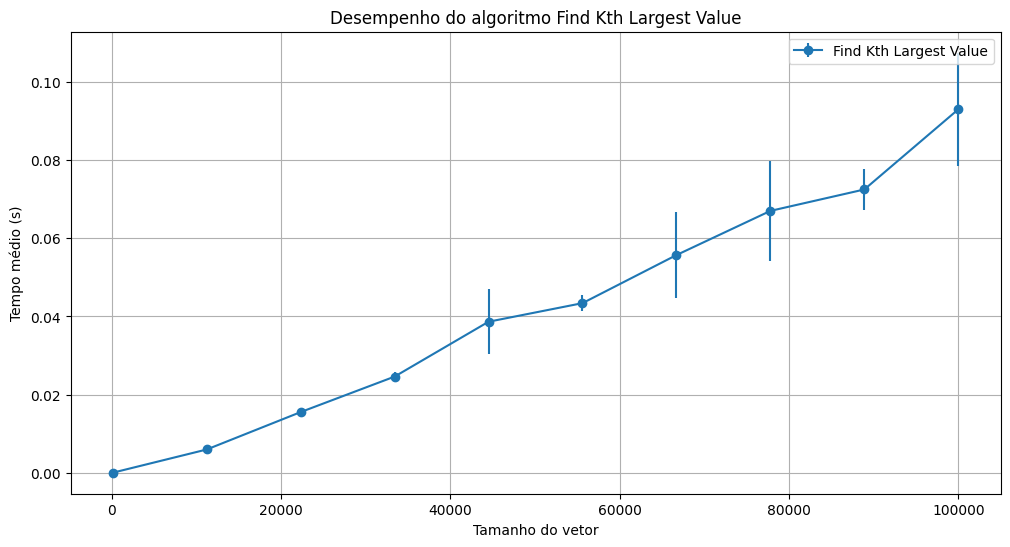

In [19]:
# Importações necessárias
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.stats import t
from binarysearchtree import BST
from closestvalue import findKthLargestValue

# Configurações
np.random.seed(42)
N = 100000  # Tamanho máximo do vetor
steps = 10  # Número de tamanhos de vetor a testar
executions_per_size = 5  # Número de execuções por tamanho de vetor

# Tamanhos dos vetores a testar
vector_sizes = np.linspace(100, N, steps, dtype=int)

# Preparação para coleta de dados
results_kth_largest = []
confidence_intervals_kth_largest = []

# Testar o algoritmo findKthLargestValue
for size in vector_sizes:
    times_kth_largest = []

    for _ in range(executions_per_size):
        data = np.random.randint(0, 1000, size)
        bst_kth_largest = BST()

        for value in data:
            bst_kth_largest.add(value)

        # Medir tempo para findKthLargestValue
        start = time()
        findKthLargestValue(bst_kth_largest, 100)  # K de exemplo
        times_kth_largest.append(time() - start)

    # Calcular médias e intervalos de confiança (95%)
    mean_kth_largest = np.mean(times_kth_largest)
    std_kth_largest = np.std(times_kth_largest, ddof=1)
    ci_kth_largest = t.ppf(0.975, executions_per_size-1) * (std_kth_largest / np.sqrt(executions_per_size))

    results_kth_largest.append(mean_kth_largest)
    confidence_intervals_kth_largest.append(ci_kth_largest)

# Gerar gráfico
plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_kth_largest, yerr=confidence_intervals_kth_largest, label='Find Kth Largest Value', fmt='-o')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho do algoritmo Find Kth Largest Value')
plt.legend()
plt.grid(True)
plt.show()